In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv ("/content/drive/My Drive/DAJUNG_comments.csv")

In [ ]:
df.head()

,comments,name,time,likes,topic,label
0,공대생이셨다니 멋져요😍 다음 라이브는 꼭 시간 맞춰올게요 ㅋㅋ 아숩지뭐에요 ㅜㅜ,Hobby choi game-log,2021-03-09T15:01:15Z,0.0,"0,1",1
1,언제 공지했을까요? 함께 하고 싶었어요 !!아쉽 <br>항상 영상 보면 저도 모르...,Čkd buds,2021-03-06T05:25:18Z,2.0,2,1
2,앗 라이브 보려했는데 아쉬워요 🥺 담에도 시간 괜찮으실때 해주세요!! 👏🏻,또*강누나,2021-03-05T05:58:44Z,3.0,"0,1",1
3,다정님 랜선집들이는 언제나봐도 힐링되고 재밋는거같아요! 집안곳곳 다정님이 고민하시고...,백도,2021-03-07T04:23:30Z,1.0,0,1
4,"상부장 위쪽은 실크벽지로 마감되어있고, 욕실 바닥은 흰색과 하늘색 타일을 섞어서 사...",다정하게DAJUNG,2020-10-25T11:19:10Z,0.0,1,0


In [ ]:
len(df)

1298

In [ ]:
df.isnull().sum()

comments    0
name        0
time        0
likes       0
topic       0
label       0
dtype: int64

In [ ]:
df = df.dropna()
len(df)

2891

**토픽별 긍/부정 점수 계산**

In [ ]:
df['likes'] = df['likes'].astype(float).astype(int)
df.head()

,comments,name,time,likes,topic,label
0,공대생이셨다니 멋져요😍 다음 라이브는 꼭 시간 맞춰올게요 ㅋㅋ 아숩지뭐에요 ㅜㅜ,Hobby choi game-log,2021-03-09T15:01:15Z,0,"0,1",1
1,언제 공지했을까요? 함께 하고 싶었어요 !!아쉽 <br>항상 영상 보면 저도 모르...,Čkd buds,2021-03-06T05:25:18Z,2,2,1
2,앗 라이브 보려했는데 아쉬워요 🥺 담에도 시간 괜찮으실때 해주세요!! 👏🏻,또*강누나,2021-03-05T05:58:44Z,3,"0,1",1
3,다정님 랜선집들이는 언제나봐도 힐링되고 재밋는거같아요! 집안곳곳 다정님이 고민하시고...,백도,2021-03-07T04:23:30Z,1,0,1
4,"상부장 위쪽은 실크벽지로 마감되어있고, 욕실 바닥은 흰색과 하늘색 타일을 섞어서 사...",다정하게DAJUNG,2020-10-25T11:19:10Z,0,1,0


In [ ]:
topic_n = [0]*4
label_1 = [0]*4

In [ ]:
for index, row in df.iterrows():
    topic_n[row['가장 비중이 높은 토픽']] += 1
    if row['label'] == 1:
      label_1[row['가장 비중이 높은 토픽']] += 1

In [ ]:
for i in range(4):
  pos = label_1[i]/topic_n[i]*100
  neg = 100-pos
  print("Topic {0} : 긍정 {1:.2f} %, 부정 {2:.2f} %". format(i, pos, neg))

Topic 0 : 긍정 50.13 %, 부정 49.87 %
Topic 1 : 긍정 46.55 %, 부정 53.45 %
Topic 2 : 긍정 47.77 %, 부정 52.23 %
Topic 3 : 긍정 51.92 %, 부정 48.08 %


**각 토픽별 긍/부정 wordcloud 그리기**

In [ ]:
! pip install wordcloud

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 7.5MB/s 
     |████████████████████████████████| 450kB 27.4MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


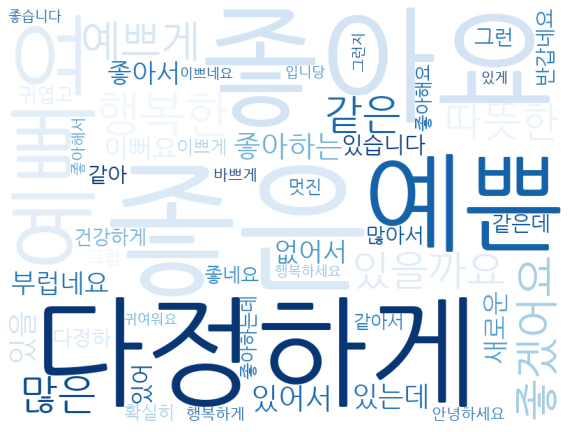

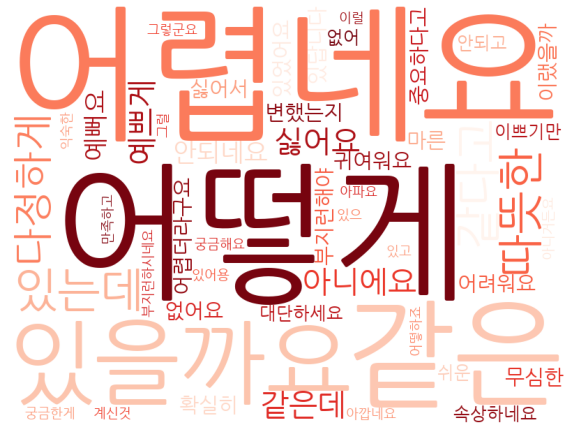

In [ ]:
# Topic0
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

def make_wordcloud(word_count,arr,pos_or_neg):
    okt = Okt()
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    morph = okt.pos(arr)
    sentences_tag.append(morph)
 
    noun_adj_list = []
    stopwords = ['같아요','있어요','있는','입니다']
    #명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Adjective'] and word not in stopwords:
                noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)

    # 긍정(pos) wordcloud를 그릴때
    if pos_or_neg=='pos':
      color="Blues"
    else:
      color="Reds"
 
    #wordCloud생성
    #한글깨지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path="NanumGothic", background_color='white', width=800, height=600, colormap=color)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
make_wordcloud(50,TopicText[0][1],'pos')
make_wordcloud(50,TopicText[0][0],'neg')

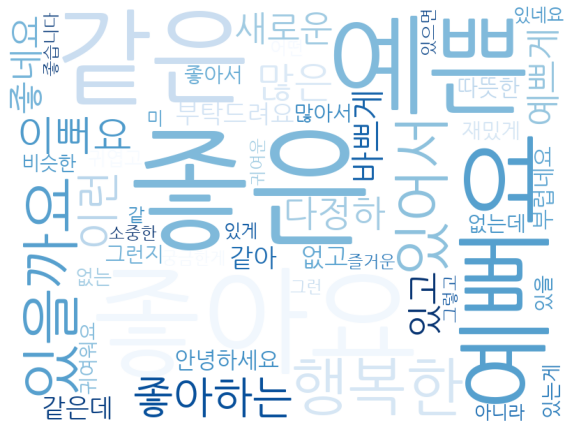

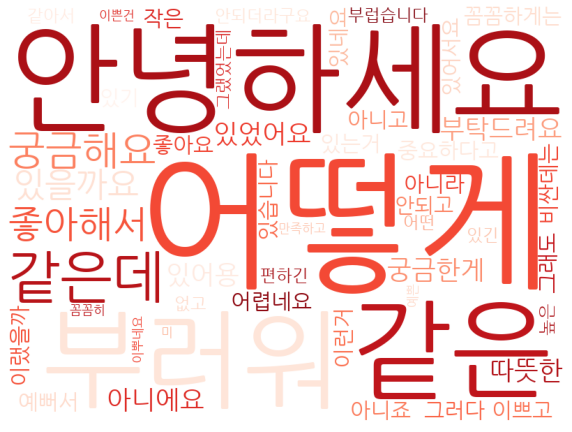

In [ ]:
# Topic1
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

def make_wordcloud(word_count,arr,pos_or_neg):
    okt = Okt()
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    morph = okt.pos(arr)
    sentences_tag.append(morph)
 
    noun_adj_list = []
    stopwords = ['같아요','있어요','있는','입니다','있는데','다정하게']
    #명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Adjective'] and word not in stopwords:
                noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)

    # 긍정(pos) wordcloud를 그릴때
    if pos_or_neg=='pos':
      color="Blues"
    else:
      color="Reds"
 
    #wordCloud생성
    #한글깨지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path="NanumGothic", background_color='white', width=800, height=600, colormap=color)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
make_wordcloud(50,TopicText[1][1],'pos')
make_wordcloud(50,TopicText[1][0],'neg')

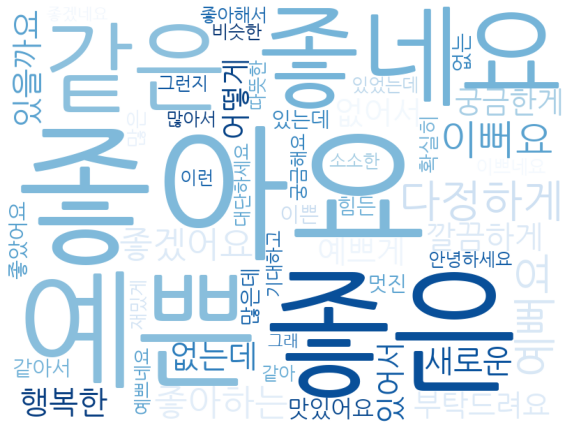

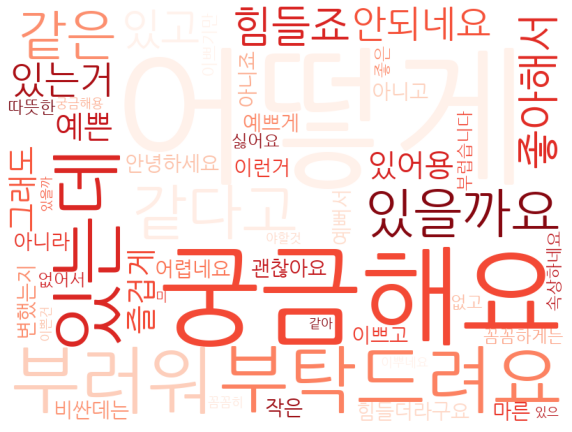

In [ ]:
# Topic2
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

def make_wordcloud(word_count,arr,pos_or_neg):
    okt = Okt()
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    morph = okt.pos(arr)
    sentences_tag.append(morph)
 
    noun_adj_list = []
    stopwords = ['같아요','있어요','있는','입니다','같은데']
    #명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Adjective'] and word not in stopwords:
                noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)

    # 긍정(pos) wordcloud를 그릴때
    if pos_or_neg=='pos':
      color="Blues"
    else:
      color="Reds"
 
    #wordCloud생성
    #한글깨지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path="NanumGothic", background_color='white', width=800, height=600, colormap=color)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
make_wordcloud(50,TopicText[2][1],'pos')
make_wordcloud(50,TopicText[2][0],'neg')

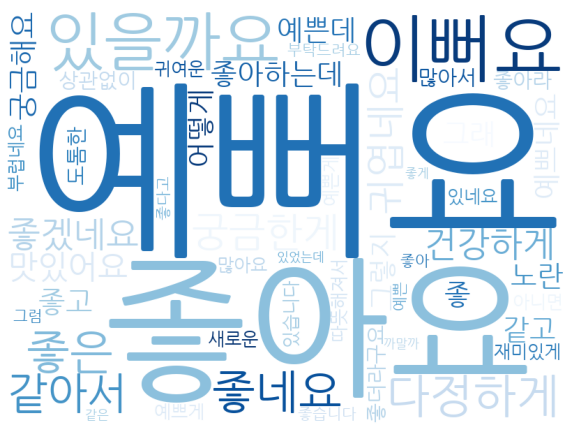

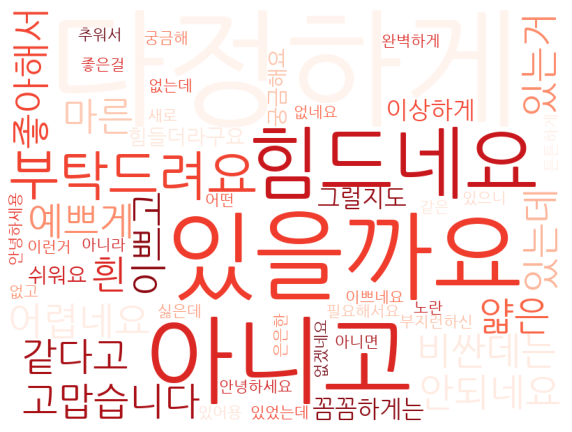

In [ ]:
# Topic3
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

def make_wordcloud(word_count,arr,pos_or_neg):
    okt = Okt()
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    morph = okt.pos(arr)
    sentences_tag.append(morph)
 
    noun_adj_list = []
    stopwords = ['같아요','있어요','있는','입니다','같은데']
    #명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Adjective'] and word not in stopwords:
                noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)

    # 긍정(pos) wordcloud를 그릴때
    if pos_or_neg=='pos':
      color="Blues"
    else:
      color="Reds"
 
    #wordCloud생성
    #한글깨지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path="NanumGothic", background_color='white', width=800, height=600, colormap=color)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
make_wordcloud(50,TopicText[3][1],'pos')
make_wordcloud(50,TopicText[3][0],'neg')